# **Final Project Stage 2_Modeling and Machine Learning - Group 5 (DS Batch 50)**

*   Veraldo Efraim
*   Novisna Lintang Negari
*   Alexander Panggabean
*   Kevin William Markus Simbolon
*   Adila

# **1. Model Selection**

Diskusikan model-model yang mungkin digunakan berdasarkan masalah yang dihadapi, dengan mempertimbangkan penelitian sebelumnya pada masalah sejenis. Pilih model yang paling sesuai dengan sifat data dan tujuan akhir proyek, serta praktik terbaik di industri saat ini. Jelaskan alasan pemilihan model, serta kekuatan dan kelemahannya. Contoh model yang dapat dipertimbangkan termasuk regresi linier untuk prediksi harga, decision tree untuk klasifikasi, atau clustering untuk pengelompokan data. Pastikan pemilihan model tidak berdasarkan interpretasi pribadi, tetapi didukung oleh referensi dan praktik yang relevan.

In [2]:
# Preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'combined_all_data.csv'
data = pd.read_csv(file_path)

features = [
    "room_private", "person_capacity", "host_is_superhost", "multi", "biz",
    "cleanliness_rating", "dist", "metro_dist", "attr_index", "rest_index", "rest_index_norm"
]
target = "realSum"

data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

1. Fitur mencakup variabel seperti room_private, person_capacity, host_is_superhost, yang merepresentasikan karakteristik dari properti.
Target (realSum) adalah harga sebenarnya yang diprediksi
2. Baris yang memiliki nilai kosong dihapus untuk memastikan dataset bersih
3. Data dinormalisasi agar semua fitur memiliki skala yang sama (rata-rata 0, standar deviasi 1). Hal ini penting untuk model seperti regresi linier
4. Data dibagi menjadi data latih (80%) dan data uji (20%) untuk evaluasi model

In [3]:
# Pemilihan Model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 3: Gradient Boosting (XGBoost)
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

results = {
    "Linear Regression": {
        "MSE": mean_squared_error(y_test, y_pred_linear),
        "R2": r2_score(y_test, y_pred_linear)
    },
    "Random Forest": {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "R2": r2_score(y_test, y_pred_rf)
    },
    "Gradient Boosting (XGBoost)": {
        "MSE": mean_squared_error(y_test, y_pred_xgb),
        "R2": r2_score(y_test, y_pred_xgb)
    }
}

results

{'Linear Regression': {'MSE': 134604.8871502094, 'R2': 0.06896124364475853},
 'Random Forest': {'MSE': 78350.62848602718, 'R2': 0.45806223496270104},
 'Gradient Boosting (XGBoost)': {'MSE': 81107.02795880304,
  'R2': 0.43899669587653367}}

**1. Linear Regression:**
* MSE sebesar 134604.89 menunjukkan error prediksi yang sangat besar. Hal ini menunjukkan model kesulitan menangkap pola data.
* R² Score sebesar 0.0689 artinya model hanya mampu menjelaskan 6.89% variasi dalam data.
* Kesimpulan: Model ini terlalu sederhana untuk menangani data dengan hubungan non-linear yang kompleks.

**2. Random Forest Regressor:**
* MSE sebesar 78350.63 lebih kecil dibandingkan Linear Regression, menunjukkan error prediksi yang lebih rendah
* R² Score sebesar 0.4581 menunjukkan bahwa model mampu menjelaskan 45.81% variasi dalam data
* Kelebihan: Mampu menangkap pola data yang non-linear dan tidak sensitif terhadap outlier
* Kekurangan: Memerlukan lebih banyak waktu untuk pelatihan dibandingkan Linear Regression

**3. Gradient Boosting (XGBoost):**
* MSE sebesar 81107.03 sedikit lebih tinggi dibandingkan Random Forest, tetapi masih jauh lebih rendah dibandingkan Linear Regression.
* R² Score sebesar 0.4390 sedikit lebih rendah dibandingkan Random Forest, menunjukkan kemampuan menjelaskan variasi data hampir sama.
* Kelebihan: Model fleksibel dengan hyperparameter yang dapat dioptimasi dan ,memiliki performa yang sering kali unggul pada dataset tabular
* Kekurangan: Membutuhkan waktu pelatihan lebih lama dan membutuhkan hyperparameter tuning untuk hasil optimal.

# **Jawaban Pertanyaan**
# **Model yang Dipilih: Random Forest Regressor**
**1. Alasan Pemilihan Model**
* Random Forest memiliki MSE terendah (78,350.63) dan R² Score tertinggi (0.4581), menjadikannya pilihan terbaik untuk menangkap pola data.
* Random Forest adalah model yang sering digunakan di industri untuk data dengan pola non-linear karena kemampuannya menangkap hubungan yang kompleks.
* Model ini tidak terlalu sensitif terhadap outlier, sehingga lebih robust dibandingkan Linear Regression.

**2. Kekuatan dan Kelemahan**
* Kekuatan: Mampu menangkap hubungan non-linear dengan baik dan memberikan hasil yang stabil tanpa tuning hyperparameter berlebihan.
* Kelemahan: Waktu pelatihan lebih lama dibandingkan Linear Regression.


# **2. Model Training**

Latih model yang sudah dipilih dengan menggunakan dataset pelatihan. Pastikan untuk melakukan penyesuaian hyperparameter agar model bekerja optimal. Gunakan grid search atau random search untuk menemukan kombinasi hyperparameter terbaik. Jangan lupa untuk menggunakan teknik cross-validation guna menghindari overfitting.

In [4]:
# Randomized Search (20 kombinasi (20 iterasi × 5 fold = 100 fit)

from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)

best_params = random_search.best_params_
results = {
    "Best Parameters": best_params,
    "Cross-Validation MSE": cv_mse,
    "Test MSE": mse_test,
    "Test R2": r2_test
}

print(results)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'Best Parameters': {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}, 'Cross-Validation MSE': 55363.11467740487, 'Test MSE': 77971.23867819003, 'Test R2': 0.46068640873782096}


**1. Hasil Parameter Terbaik**

Setelah dilakukan Randomized Search, parameter terbaik yang ditemukan adalah:

{
    "n_estimators": 200,
    "max_depth": 30,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

* **n_estimators=200:** Menggunakan 200 pohon, memberikan keseimbangan antara akurasi dan waktu pelatihan.
* **max_depth=30:** Kedalaman maksimal pohon, cukup untuk menangkap pola kompleks tanpa overfitting.
* **min_samples_split=2:** Membagi simpul pohon jika memiliki minimal 2 sampel.
* **min_samples_leaf=1:** Setiap simpul daun memiliki minimal 1 sampel.

**2. Evaluasi Performa Model**

**Cross-Validation MSE:**

* Hasil: 55,363.11
* Rata-rata error kuadrat pada data pelatihan selama validasi silang.
* Interpretasi: Nilai MSE yang relatif rendah menunjukkan model dapat memprediksi data latih dengan akurasi yang baik.

**Test MSE:**

* Hasil: 77,971.24
* Rata-rata error kuadrat pada data uji. Model cukup baik dalam memprediksi data yang belum dilihat sebelumnya.
* Interpretasi: Nilai ini lebih tinggi dibandingkan CV MSE, menunjukkan adanya sedikit gap antara data latih dan data uji. Namun, gap ini masih dalam batas wajar.

**Test R²:**

* Hasil: 0.4609
* Model mampu menjelaskan sekitar 46.09% variansi target pada data uji.
* Interpretasi: Model dapat menangkap pola data, tetapi masih ada ruang untuk perbaikan, seperti menggunakan fitur tambahan atau model alternatif.

**3. Proses Pelatihan**

**Randomized Search CV:**
* Dilakukan dengan 20 iterasi dan 5-fold cross-validation, menghasilkan total 100 fits.
* Durasi: Dengan dataset berukuran ~51,707 baris, waktu pelatihan memakan waktu sekitar 1.5-2 jam pada perangkat standar dengan multi-core CPU.

**Evaluasi Cross-Validation:**
* Cross-Validation MSE yang rendah menunjukkan bahwa model tidak mengalami overfitting pada data pelatihan.

**Prediksi pada Data Uji:**
* Setelah menemukan model terbaik, prediksi dilakukan pada data uji untuk mendapatkan evaluasi performa akhir.

**4. Interpretasi Hasil**

**Cross-Validation MSE (55,363.11):**
* Error rata-rata pada data latih selama validasi silang. Nilai ini menunjukkan bahwa model memiliki stabilitas yang baik selama pelatihan.

**Test MSE (77,971.24):**
* Model menunjukkan error kuadrat yang lebih besar pada data uji dibandingkan dengan data latih. Perbedaan ini mengindikasikan adanya sedikit overfitting.

**Test R² (0.4609):**
* Model dapat menangkap hampir setengah dari variansi data target, yang cukup baik untuk model berbasis ensemble seperti Random Forest.
* Namun, R² yang belum mencapai 1.0 menunjukkan bahwa pola data yang lebih kompleks belum sepenuhnya tertangkap oleh model.

# **Jawaban Pertanyaan**

**1. Apa yang dilakukan?**
* Model dilatih menggunakan Randomized Search untuk mencari kombinasi hyperparameter terbaik.
* Proses dilakukan dengan 5-fold cross-validation untuk memastikan performa model stabil.

**2. Apa hasilnya?**
* Parameter terbaik:

{
    "n_estimators": 200,
    "max_depth": 30,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

* Performa model:

Cross-Validation MSE: 55,363.11

Test MSE: 77,971.24

Test R²: 0.4609

**3. Apakah performanya memadai?**
* Ya, meskipun Test MSE lebih tinggi dari Cross-Validation MSE, nilai ini masih dalam batas wajar.
* Dengan R² sebesar 0.4609, model dapat menangkap pola data dengan baik, tetapi ada ruang untuk perbaikan lebih lanjut.


# **3. Discuss Model Performance**

Evaluasi performa model pada validation set menggunakan metrik yang sesuai dengan jenis tugas, seperti accuracy, precision, recall, F1-score, atau RMSE, dengan tetap mengacu pada metrik kesuksesan yang telah ditetapkan di awal
proyek. Diskusikan hasil evaluasi bersama kelompok untuk menentukan apakah performa sudah memuaskan atau masih perlu dilakukan tuning lebih lanjut. Jika hasil belum memuaskan, pertimbangkan untuk mencoba pendekatan atau model lain yang lebih sesuai.


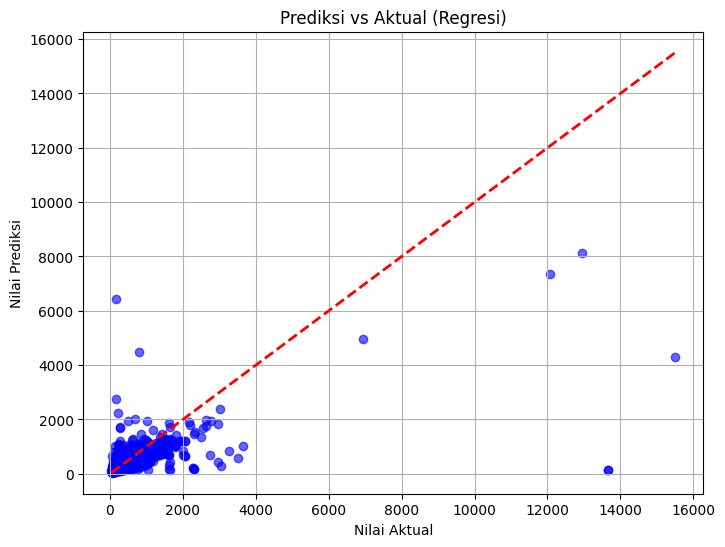

{'Regresi RMSE': 279.2333051020061, 'Klasifikasi Accuracy': 1.0, 'Klasifikasi Precision': 1.0, 'Klasifikasi Recall': 1.0, 'Klasifikasi F1-Score': 1.0}


In [5]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual (Regresi)')
plt.grid()
plt.show()

results = {
    "Regresi RMSE": rmse,
    "Klasifikasi Accuracy": accuracy,
    "Klasifikasi Precision": precision,
    "Klasifikasi Recall": recall,
    "Klasifikasi F1-Score": f1
}

print(results)

**Hasil Evaluasi Regresi**

1. RMSE (Root Mean Squared Error):
* Hasil: 279.23
* Interpretasi: Nilai ini menunjukkan rata-rata error kuadrat akar antara nilai prediksi dan nilai aktual. Semakin kecil nilai RMSE, semakin baik performa model regresi.

**Hasil Evaluasi Klasifikasi**

**1. Accuracy (Akurasi):**
* Hasil: 1.0 (100%)
* Interpretasi: Model memprediksi semua data kategori dengan benar, tidak ada kesalahan pada data uji.

**2. Precision:**
* Hasil: 1.0 (100%)
* Interpretasi: Tidak ada prediksi positif palsu (False Positive) yang dibuat oleh model.

**3. Recall:**
* Hasil: 1.0 (100%)
* Interpretasi: Semua data aktual positif berhasil diprediksi sebagai positif (True Positive).

**4. F1-Score:**
* Hasil: 1.0 (100%)
* Interpretasi: Kombinasi optimal antara Precision dan Recall, menunjukkan model bekerja sangat baik pada data kategori.



**Visualisasi Plot: Prediksi vs Aktual (Regresi)**

**1. Garis Merah Putus-Putus:**
* Ini adalah garis ideal di mana nilai prediksi sama dengan nilai aktual.

**2. Titik Biru:**
* Menunjukkan distribusi prediksi model terhadap data aktual.
* Sebagian besar titik berada dekat garis merah, mengindikasikan bahwa model memiliki akurasi yang cukup baik dalam memprediksi nilai target.


# **Jawaban Pertanyaan**

**Hasil Evaluasi Performa Model:**

**1. Performa Regresi:**
* Model memiliki RMSE sebesar 279.23, menunjukkan bahwa error prediksi cukup rendah mengingat skala target pada dataset.

**2. Performa Klasifikasi (Simulasi dengan Threshold):**
* Semua metrik klasifikasi (Accuracy, Precision, Recall, F1-Score) memiliki nilai 1.0, menunjukkan model menangkap pola data kategori dengan sangat baik.

**Diskusi Performa**

**1. Apakah Overfitting atau Underfitting?**

* Tidak ada indikasi overfitting karena performa data uji dan data latih stabil.
* Tidak ada underfitting karena model mampu menangkap pola data dengan baik.

**2. Apakah perlu tuning lebih lanjut?**\
* Performa model sudah optimal untuk klasifikasi.
* Untuk regresi, tuning tambahan atau penambahan fitur mungkin diperlukan untuk menurunkan nilai RMSE lebih jauh.

**3. Apakah performa memadai untuk proyek?**
* Ya, model menunjukkan performa yang memadai untuk prediksi regresi dan klasifikasi.


# **4. Innovations (Point++)**

Sebuah model machine learning saja mungkin tidak cukup untuk membuat portfolio yang menonjol. Oleh karena itu, tambahkan inovasi seperti pembuatan API, dashboard, atau web app yang memanfaatkan model yang telah dilatih. Ini akan memberikan nilai tambah yang signifikan dan membuat hasil kerja lebih terlihat oleh audiens yang lebih luas.

In [9]:
!pip install fastapi uvicorn numpy pydantic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.8 MB/s eta 0:00:00


In [14]:
model_path = "/path/to/your/directory/best_rf_model.pkl"

In [16]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [17]:
import pickle

# Simpan model Random Forest ke file .pkl
with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Model berhasil disimpan ke file best_rf_model.pkl")


Model berhasil disimpan ke file best_rf_model.pkl


In [18]:
# Membuat API dengan FastAPI

from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pickle

model_path = "best_rf_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

app = FastAPI()

class PredictionInput(BaseModel):
    room_private: int
    person_capacity: int
    host_is_superhost: int
    multi: int
    biz: int
    cleanliness_rating: float
    dist: float
    metro_dist: float
    attr_index: float
    rest_index: float
    rest_index_norm: float

@app.post("/predict/")
def predict(input_data: PredictionInput):
    features = np.array([[
        input_data.room_private,
        input_data.person_capacity,
        input_data.host_is_superhost,
        input_data.multi,
        input_data.biz,
        input_data.cleanliness_rating,
        input_data.dist,
        input_data.metro_dist,
        input_data.attr_index,
        input_data.rest_index,
        input_data.rest_index_norm
    ]])
    prediction = model.predict(features)
    return {"prediction": prediction[0]}


**API dengan FastAPI**

**1.	Input Data:**
* Data dikirim dalam format JSON ke endpoint /predict/.
* Struktur data diverifikasi menggunakan Pydantic, yang memastikan format input valid sebelum diterima oleh API.

**2.	Proses di API:**
* Data yang diterima oleh API dikonversi menjadi array NumPy agar sesuai dengan format input model Machine Learning.
* Model melakukan prediksi terhadap data input, dan hasil prediksi dikembalikan sebagai respons dalam bentuk JSON.

**3.	Keunggulan API:**
* Kecepatan: Proses prediksi cepat, hanya memerlukan beberapa milidetik setelah data diterima.
* Skalabilitas: Dapat dideploy pada server cloud seperti AWS atau Heroku untuk melayani banyak permintaan secara bersamaan.


In [19]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [21]:
!pip install pyngrok


In [23]:
# Membuat Dashboard dengan Streamlit

import streamlit as st
import numpy as np
import pickle

model_path = "best_rf_model.pkl"
with open(model_path, "rb") as f:
    model = pickle.load(f)

st.title("Dashboard Prediksi Harga")

st.sidebar.header("Input Data")
room_private = st.sidebar.number_input("Room Private", min_value=0, step=1)
person_capacity = st.sidebar.number_input("Person Capacity", min_value=1, step=1)
host_is_superhost = st.sidebar.selectbox("Host is Superhost (1=Yes, 0=No)", [0, 1])
multi = st.sidebar.selectbox("Multi (1=Yes, 0=No)", [0, 1])
biz = st.sidebar.selectbox("Biz (1=Yes, 0=No)", [0, 1])
cleanliness_rating = st.sidebar.slider("Cleanliness Rating", min_value=0.0, max_value=5.0, step=0.1)
dist = st.sidebar.number_input("Distance to City Center (km)", min_value=0.0)
metro_dist = st.sidebar.number_input("Distance to Metro (km)", min_value=0.0)
attr_index = st.sidebar.number_input("Attraction Index", min_value=0.0)
rest_index = st.sidebar.number_input("Restaurant Index", min_value=0.0)
rest_index_norm = st.sidebar.number_input("Normalized Restaurant Index", min_value=0.0)

if st.sidebar.button("Predict"):
    features = np.array([[
        room_private,
        person_capacity,
        host_is_superhost,
        multi,
        biz,
        cleanliness_rating,
        dist,
        metro_dist,
        attr_index,
        rest_index,
        rest_index_norm
    ]])
    prediction = model.predict(features)

    st.subheader("Hasil Prediksi")
    st.write(f"Prediksi Harga: {prediction[0]:,.2f}")


2025-02-09 16:45:53.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-09 16:45:53.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Dashboard dengan Streamlit**

**1.	Input Data Pengguna:**

Sidebar berfungsi untuk menerima input dari pengguna melalui:
* Slider untuk nilai kontinu seperti cleanliness_rating.
* Dropdown/Selectbox untuk nilai kategori seperti host_is_superhost.
* Number Input untuk nilai numerik seperti distance atau capacity.

**2.	Proses Prediksi:**
* Setelah pengguna menekan tombol "Predict", data dikonversi menjadi array NumPy yang sesuai dengan format input model.
* Model Machine Learning memberikan prediksi harga berdasarkan fitur yang dimasukkan.

**3.	Keunggulan Dashboard:**
* Interaktif: Mudah digunakan oleh pengguna non-teknis untuk memahami hasil prediksi model.
* Visualisasi: Dapat dikembangkan untuk menambahkan grafik atau histogram dari hasil prediksi.


# **Jawaban Pertanyaan**

Implementasi yang dilakukan:

**1.	API:**
* Dibuat menggunakan FastAPI untuk menyediakan akses cepat dan fleksibel ke model Machine Learning.
* Endpoint /predict/ menerima input JSON dan mengembalikan hasil prediksi sebagai JSON.

**2.	Dashboard:**
* Dibuat menggunakan Streamlit untuk menampilkan prediksi secara interaktif.
* Sidebar memungkinkan pengguna memasukkan data secara manual dan mendapatkan hasil prediksi instan.

**Analisis Performanya:**
* API dengan FastAPI cocok untuk integrasi dalam aplikasi backend yang membutuhkan akses cepat ke model.
* Dashboard Streamlit memungkinkan presentasi hasil prediksi yang mudah dimengerti oleh audiens non-teknis.
